Trend Analysis Summary:
         Hashtag/Trend  Engagement        Reach  Engagement_Growth  \
0       #AIInMarketing  171.803922  2238.529412          12.588235   
1           #EcoTravel  165.875000  2255.321429          11.946429   
2         #GreenEnergy  173.882353  2145.352941          12.960784   
3          #SmartHomes  183.375000  2225.850000          13.275000   
4  #SustainableFashion  186.220339  2296.983051          12.000000   
5        #VeganRecipes  184.069767  2216.581395          12.906977   

   Predicted_Engagement  Predicted_Reach  
0            193.431003      2520.320761  
1            185.691138      2524.751792  
2            196.418870      2423.407509  
3            207.718031      2521.331587  
4            208.566780      2572.621017  
5            207.827610      2502.675041  

Top 5 Trending Hashtags:
         Hashtag/Trend  Engagement        Reach  Engagement_Growth  \
4  #SustainableFashion  186.220339  2296.983051          12.000000   
5        #VeganRec

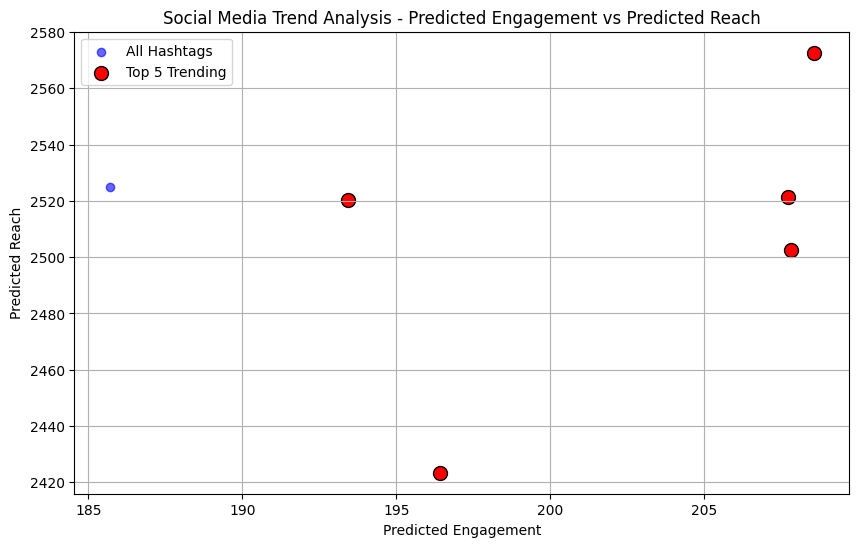

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/social_media_trend_analysis.csv')

trend_analysis = data.groupby('Hashtag/Trend').agg({
    'Engagement': 'mean',
    'Reach': 'mean',
    'Engagement_Growth': 'mean'
}).reset_index()

trend_analysis['Predicted_Engagement'] = trend_analysis['Engagement'] * (1 + trend_analysis['Engagement_Growth'] / 100)
trend_analysis['Predicted_Reach'] = trend_analysis['Reach'] * (1 + trend_analysis['Engagement_Growth'] / 100)

print("Trend Analysis Summary:")
print(trend_analysis)

top_trending = trend_analysis.sort_values(by=['Predicted_Engagement', 'Predicted_Reach'], ascending=False).head(5)

print("\nTop 5 Trending Hashtags:")
print(top_trending)

# Plotting the data
plt.figure(figsize=(10, 6))

# Scatter plot for Predicted Engagement vs Predicted Reach
plt.scatter(trend_analysis['Predicted_Engagement'], trend_analysis['Predicted_Reach'], c='blue', label='All Hashtags', alpha=0.6)

# Highlight the top 5 trending hashtags
plt.scatter(top_trending['Predicted_Engagement'], top_trending['Predicted_Reach'], c='red', label='Top 5 Trending', edgecolors='black', s=100)

plt.title('Social Media Trend Analysis - Predicted Engagement vs Predicted Reach')
plt.xlabel('Predicted Engagement')
plt.ylabel('Predicted Reach')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
